In [15]:
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt

np.random.seed(42)
plt.rcParams['figure.figsize']=(10,8)
plt.style.use('seaborn-darkgrid')


def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [41]:
# conditional 공식 그대로. mean vector =0
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

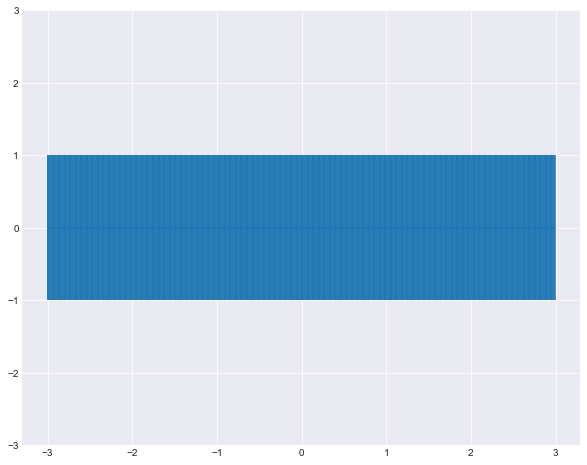

In [44]:
θ = [1, 10] # cov의 param. scale과 간격
σ_0 = exponential_cov(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)
plt.ylim(-3, 3);

In [68]:
x = [1.]
y = [np.random.normal(scale=σ_0)]
y

[-0.23415337472333597]

In [69]:
σ_1 = exponential_cov(x, x, θ)

In [70]:
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

In [71]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

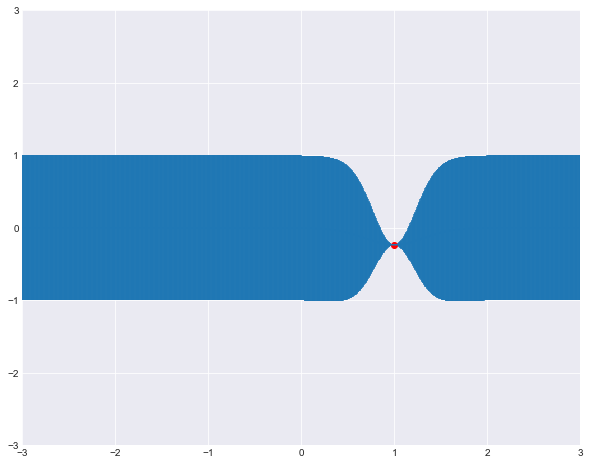

In [72]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

In [73]:
m, s = conditional([-0.7], x, y, θ)
y2 = np.random.normal(m, s)
y2

-0.23413708109866707

In [74]:
x.append(-0.7)
y.append(y2)

In [75]:
σ_2 = exponential_cov(x, x, θ)

predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

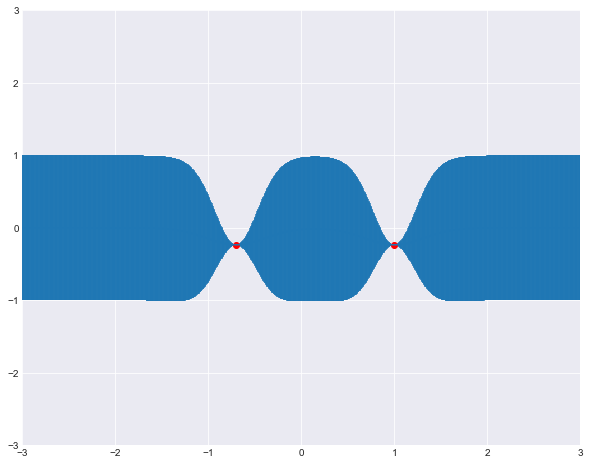

In [77]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

In [80]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([-0.91033053, -1.51142223, -0.48268252, -0.93892908, -0.22237635])

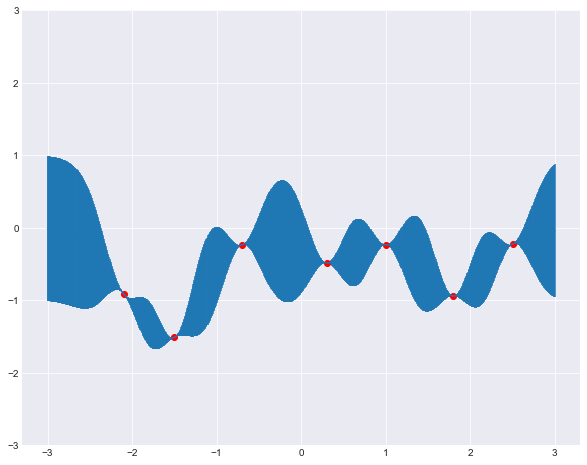

In [82]:
x += x_more
y += y_more.tolist()

σ_new = exponential_cov(x, x, θ)

predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.ylim(-3, 3);

In [101]:
x = np.array([-5, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4,
-3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3, -2.9,
-2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8,
-1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7,
-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1,
3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4,
4.5, 4.6, 4.7, 4.8, 4.9, 5])

y = np.array([1.04442478194401, 0.948306088493654, 0.357037759697332, 0.492336514646604,
0.520651364364746, 0.112629866592809, 0.470995468454158, -0.168442254267804,
0.0720344402575861, -0.188108980535916, -0.0160163306512027,
-0.0388792158617705, -0.0600673630622568, 0.113568725264636,
0.447160403837629, 0.664421188556779, -0.139510743820276, 0.458823971660986,
0.141214654640904, -0.286957663528091, -0.466537724021695, -0.308185884317105,
-1.57664872694079, -1.44463024170082, -1.51206214603847, -1.49393593601901,
-2.02292464164487, -1.57047488853653, -1.22973445533419, -1.51502367058357,
-1.41493587255224, -1.10140254663611, -0.591866485375275, -1.08781838696462,
-0.800375653733931, -1.00764767602679, -0.0471028950122742, -0.536820626879737,
-0.151688056391446, -0.176771681318393, -0.240094952335518, -1.16827876746502,
-0.493597351974992, -0.831683011472805, -0.152347043914137, 0.0190364158178343,
-1.09355955218051, -0.328157917911376, -0.585575679802941, -0.472837120425201,
-0.503633622750049, -0.0124446353828312, -0.465529814250314,
-0.101621725887347, -0.26988462590405, 0.398726664193302, 0.113805181040188,
0.331353802465398, 0.383592361618461, 0.431647298655434, 0.580036473774238,
0.830404669466897, 1.17919105883462, 0.871037583886711, 1.12290553424174,
0.752564860804382, 0.76897960270623, 1.14738839410786, 0.773151715269892,
0.700611498974798, 0.0412951045437818, 0.303526087747629, -0.139399513324585,
-0.862987735433697, -1.23399179134008, -1.58924289116396, -1.35105117911049,
-0.990144529089174, -1.91175364127672, -1.31836236129543, -1.65955735224704,
-1.83516148300526, -2.03817062501248, -1.66764011409214, -0.552154350554687,
-0.547807883952654, -0.905389222477036, -0.737156477425302, -0.40211249920415,
0.129669958952991, 0.271142753510592, 0.176311762529962, 0.283580281859344,
0.635808289696458, 1.69976647982837, 1.10748978734239, 0.365412229181044,
0.788821368082444, 0.879731888124867, 1.02180766619069, 0.551526067300283])

N = len(y)

## pymc3

In [104]:
import pymc3 as pm
import theano.tensor as tt

X = x.reshape(-1,1)

In [109]:
with pm.Model() as gp_fit:

    ρ = pm.Gamma('ρ', 1, 1)
    η = pm.Gamma('η', 1, 1)
    
    K = η * pm.gp.cov.Matern32(1, ρ)

In [ ]:
with gp_fit:
    
    M = pm.gp.mean.Zero()
    
    σ = pm.HalfCauchy('σ', 2.5)
    gp = pm.gp.Marginal(cov_func=K)

    y_obs = gp.marginal_likelihood('y_obs',X=X,y=y, noise=σ)
    trace = pm.sample(2000, n_init=20000)

INFO (theano.gof.compilelock): Refreshing lock C:\Users\dhdcj\AppData\Local\Theano\compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_61_Stepping_4_GenuineIntel-3.7.3-32\lock_dir\lock
C:\Users\dhdcj\AppData\Roaming\Python\Python37\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\dhdcj\AppData\Roaming\Python\Python37\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error o

In [90]:
# Xnew = np.linspace(0,2,100)[:,None]
np.linspace(0,2,100)[:,None]

[-0.23415337472333597,
 -0.23413708109866707,
 -0.910330526285152,
 -1.51142222560609,
 -0.4826825249415877,
 -0.9389290838731924,
 -0.22237635230949648]

## reference
https://github.com/fonnesbeck/gp_showdown/blob/master/GP%20Showdown.ipynb